<a href="https://colab.research.google.com/github/Yashwithareddy01/yashwitha/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, model_selection, preprocessing, metrics, datasets

warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Generating random regression data

X, y = datasets.make_regression(n_samples = 1000, n_features = 2, noise = 7, random_state = 16)
print(X, y)

print(X.shape, y.shape)

[[ 0.04553106 -0.53429431]
 [-0.49399777 -0.71171931]
 [-1.65015899  0.95008197]
 ...
 [-0.41282531 -0.05254417]
 [ 0.21127547  0.21044314]
 [ 0.15528162  0.61739277]] [-1.39117766e+01 -6.55073775e+01 -5.68418601e+01  1.55036359e+00
  8.22114774e+00 -8.72079683e+00  3.97522589e+01  7.91951259e+01
 -4.17121218e+01  1.91829284e+01 -4.57900448e+01 -1.09687828e+02
  9.76677996e+01 -1.64531003e+02 -6.22573177e+01 -3.19848574e+01
 -2.75335974e+01 -3.63774963e+01 -9.61234921e+01  2.52241894e+01
 -6.36964662e+01  9.05181434e+00 -1.15927876e+02 -8.74089122e+01
  3.48769434e+01 -3.78620469e+01  5.19876605e+01  2.19190679e+01
 -3.42092859e+01  6.28370623e+01 -1.70312542e+01 -3.83691084e+00
 -3.15580278e+01  3.61206409e+01 -2.73859144e+01  3.81052170e+01
  1.32291434e+02 -1.55591710e+01 -8.97423359e+01  3.10994312e+01
 -5.56623299e+00 -2.18018815e+01  8.76978740e+01  4.43185417e+01
  1.24423330e+01 -8.26101297e+01 -3.41396599e+01 -2.83578942e+01
 -4.67237578e+01  6.26290673e+01  1.20051135e+00  3.

In [ ]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 3)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 2) (200, 2) (800,) (200,)


In [ ]:
# Feature Scaling ( Standardization or Z-Score Normalization )

scaler = preprocessing.StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


print('X_train', X_train)
print('X_test', X_test )
print(X_train.mean(), X_train.std())
print(X_test.mean(), X_test.std())

X_train [[ 0.3858925  -0.68811136]
 [ 0.73661324 -0.13792462]
 [ 1.70029784  0.28149645]
 ...
 [-0.66104999 -0.18626289]
 [ 0.06990052 -1.23287782]
 [-0.08451654  0.22905024]]
X_test [[ 0.43211826 -0.53794435]
 [ 0.50541137  1.75880273]
 [ 0.05360588 -0.75967563]
 [-1.31512043 -0.19443715]
 [-0.84444538  0.84661545]
 [ 1.82624886 -0.80152624]
 [ 2.09131949 -0.42218021]
 [ 1.0368531  -0.47003091]
 [ 2.03860724 -0.56711006]
 [-0.59204771 -0.49770763]
 [ 0.05863051  1.04668753]
 [-0.68718139  1.44904391]
 [ 0.94917738 -0.12443923]
 [ 0.30697072  0.4625853 ]
 [-0.69093111  1.49420976]
 [ 0.85460682  0.69163472]
 [ 0.35413219  0.23800685]
 [ 0.04439159  1.86721467]
 [ 0.11174893  0.46384793]
 [-1.45055903 -0.11929318]
 [ 0.38514385  1.07139428]
 [ 0.78936419  0.88404732]
 [ 1.20358215 -0.18769343]
 [ 0.36276488  1.02221971]
 [ 1.26594621 -1.67718094]
 [-0.45087438 -1.18491815]
 [-0.04637291 -0.50300661]
 [-1.38530188  2.73628797]
 [ 0.20310615 -0.65611586]
 [ 0.91626407  0.12967198]
 [-0.13

In [ ]:
from sklearn.metrics import accuracy_score
lr = BatchGD(max_iter = 10000, eta = 0.01)

lr.fit(X_train, y_train)

print(f"Weights (Coefficients): {lr.weights}\nBias (Intercept): {lr.bias}")

y_test_pred = lr.predict(X_test)

r2_score = metrics.r2_score(y_test, y_test_pred)

print("R-Square (Coefficient of determination): {score}".format(score = r2_score))

In [ ]:
# Batch Gradient Descent

class BatchGD:

    def __init__(self, max_iter = 1000, eta = 0.001, tol = 1e-6):
        self.max_iter = max_iter
        self.eta = eta
        self.tol = tol
        self.weights = self.bias = None

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.random.rand(n)
        self.bias = np.random.rand(1)[0]
        costs = []

        for i in range(1, self.max_iter + 1):
            y_pred = np.dot(X, self.weights) + self.bias
            mse = (1 / m) * np.sum(np.square(y_pred - y))
            costs.append(mse)

            dw = (2 / m) * np.dot(X.T, y_pred - y)
            db = (2 / m) * np.sum(y_pred - y)

            temp = self.weights
            self.weights = self.weights - self.eta * dw
            self.bias = self.bias - self.eta * db

            if i % 100 == 0:
                print(f"Epoch: {i}\tCost: {mse}")

            if all(abs(self.weights - temp) <= self.tol):
                print(f"Stopped at iteration {i} !")
                break

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred



In [ ]:
# Training and evaluation ( Batch GD )
from sklearn.metrics import accuracy_score
lr = BatchGD(max_iter = 10000, eta = 0.01)

lr.fit(X_train, y_train)

print(f"Weights (Coefficients): {lr.weights}\nBias (Intercept): {lr.bias}")

y_test_pred = lr.predict(X_test)

r2_score = metrics.r2_score(y_test, y_test_pred)

print("R-Square (Coefficient of determination): {score}".format(score = r2_score))


Epoch: 100	Cost: 122.22592886492234
Epoch: 200	Cost: 52.5000083258956
Epoch: 300	Cost: 51.4539735157155
Epoch: 400	Cost: 51.438183432165005
Epoch: 500	Cost: 51.437943070654654
Epoch: 600	Cost: 51.437939370669824
Stopped at iteration 675 !
Weights (Coefficients): [54.5945448  38.50983732]
Bias (Intercept): 0.07979733051169974
R-Square (Coefficient of determination): 0.9852928199695459


In [ ]:
# Implementation through Sklean API

model = linear_model.LinearRegression()

model.fit(X_train, y_train)

print(f"Weights (Coefficients): {model.coef_}\nBias (Intercept): {model.intercept_}")

r2_score = model.score(X_test, y_test)

print("R-Square (Coefficient of determination): {score}".format(score = r2_score))

Weights (Coefficients): [54.59459269 38.50985045]
Bias (Intercept): 0.07979681999767178
R-Square (Coefficient of determination): 0.9852928016810484


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

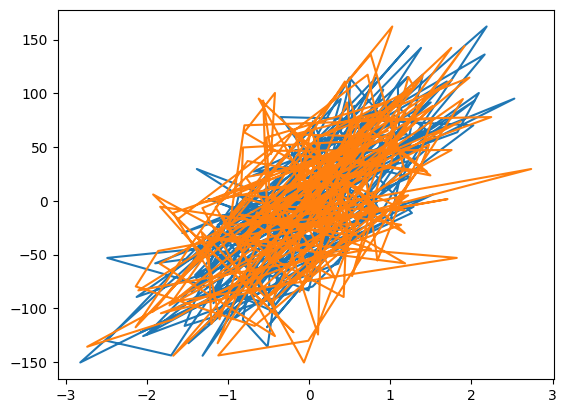

In [ ]:
plt.plot(X_test,y_test)

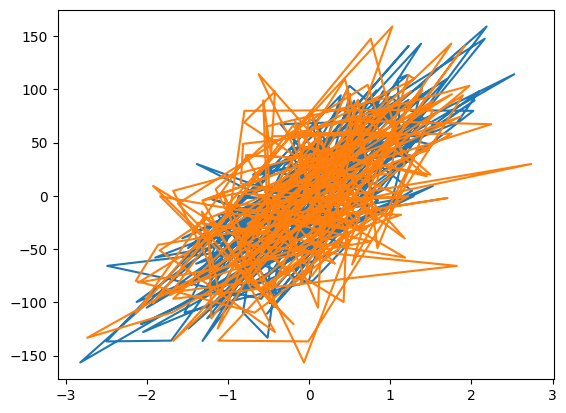

In [ ]:
plt.plot(X_test, y_test_pred)

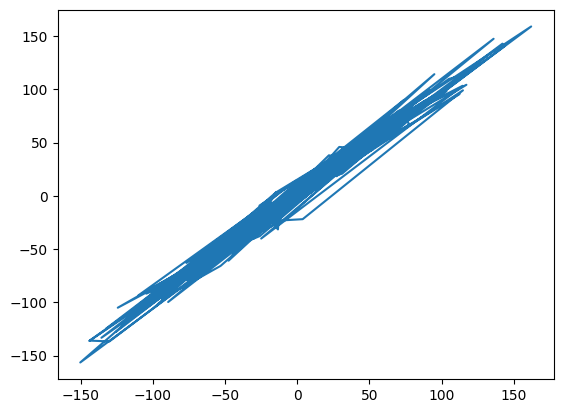

In [ ]:
plt.plot(y_test, y_test_pred)

In [ ]:
# Stochastic Gradient Descent

class StochasticGD:

    def __init__(self, max_iter = 100, t0 = 5, t1 = 50, tol = 1e-7):
        self.max_iter = max_iter
        self.tol = tol
        self.t0, self.t1 = 5, 50
        self.weights = self.bias = None

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.random.rand(n)
        self.bias = np.random.rand(1)[0]
        losses, flag = [], False

        for epoch in range(1, self.max_iter + 1):
            perm_idx = np.random.permutation(m)
            X, y = X[perm_idx], y[perm_idx]

            if flag: break

            if epoch % 10 == 0:
                print(f"Epoch: {epoch}\tLoss: {losses[epoch - 1]}")

            for i in range(m):
                rand_idx = np.random.randint(m)
                X_i = X[rand_idx: rand_idx + 1]
                y_i = y[rand_idx: rand_idx + 1]

                y_pred = np.dot(X_i, self.weights) + self.bias
                loss = np.sum(np.square(y_pred - y_i))
                losses.append(loss)

                dw = np.dot(X_i.T, y_pred - y_i)
                db = np.sum(y_pred - y_i)

                temp = self.weights
                eta = self.learning_schedule(m * epoch + i)

                self.weights = self.weights - eta * dw
                self.bias = self.bias - eta * db

                if all(abs(self.weights - temp) <= self.tol):
                    print(f"Stopped at iteration {epoch} !")
                    flag = True
                    break

    def learning_schedule(self, t):
        return self.t0 / (t + self.t1)

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred


In [ ]:
# Training and evaluation ( Stochastic GD )

lr = StochasticGD(max_iter = 50, tol = 1e-8)

lr.fit(X_train, y_train)

print(f"Weights (Coefficients): {lr.weights}\nBias (Intercept): {lr.bias}")

y_test_pred = lr.predict(X_test)

r2_score = metrics.r2_score(y_test, y_test_pred)

print("R-Square (Coefficient of determination): {score}".format(score = r2_score))

Epoch: 10	Loss: 3.768226177363565
Epoch: 20	Loss: 13979.566761152959
Epoch: 30	Loss: 69.29682763619587
Epoch: 40	Loss: 4471.2614209819085
Stopped at iteration 41 !
Weights (Coefficients): [54.61267415 38.54800831]
Bias (Intercept): 0.03960885061594647
R-Square (Coefficient of determination): 0.9853488594809806


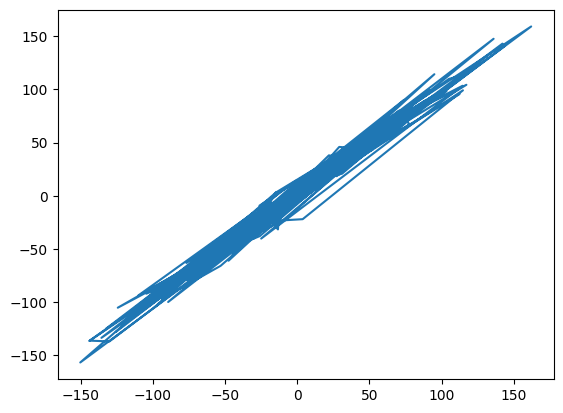

In [ ]:
plt.plot(y_test, y_test_pred)

In [ ]:
# Implementation through Sklean API

model = linear_model.SGDRegressor()

model.fit(X_train, y_train)

print(f"Weights (Coefficients): {model.coef_}\nBias (Intercept): {model.intercept_}")

r2_score = model.score(X_test, y_test)

print("R-Square (Coefficient of determination): {score}".format(score = r2_score))

Weights (Coefficients): [54.60616027 38.51986795]
Bias (Intercept): [0.06352075]
R-Square (Coefficient of determination): 0.9853052860079451


In [ ]:
#Mini-Batch Gradient Descent

class MiniBatchGD:

    def __init__(self, max_iter = 100, eta = 0.001, tol = 1e-7, batch_size = 32):
        self.max_iter = max_iter
        self.tol = tol
        self.eta = eta
        self.batch_size = batch_size
        self.weights = self.bias = None

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.random.rand(n)
        self.bias = np.random.rand(1)[0]
        costs, flag = [], False

        for epoch in range(1, self.max_iter + 1):
            perm_idx = np.random.permutation(m)
            X, y = X[perm_idx], y[perm_idx]

            if flag: break

            if epoch % 100 == 0:
                print(f"Epoch: {epoch}\tLoss: {costs[epoch - 1]}")

            for i in range(0, m, self.batch_size):
                X_mini = X[i: i + self.batch_size]
                y_mini = y[i: i + self.batch_size]

                y_pred = np.dot(X_mini, self.weights) + self.bias
                cost = 1 / self.batch_size * np.sum(np.square(y_pred - y_mini))
                costs.append(cost)

                dw = 2 / self.batch_size * np.dot(X_mini.T, y_pred - y_mini)
                db = 2 / self.batch_size * np.sum(y_pred - y_mini)

                temp = self.weights
                self.weights = self.weights - self.eta * dw
                self.bias = self.bias - self.eta * db

                if all(abs(self.weights - temp) <= self.tol):
                    print(f"Stopped at iteration {epoch} !")
                    flag = True
                    break

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

In [ ]:
# Training and evaluation ( MiniBatch GD )

lr = MiniBatchGD(max_iter = 1000, tol = 1e-7)

lr.fit(X_train, y_train)

print(f"Weights (Coefficients): {lr.weights}\nBias (Intercept): {lr.bias}")

y_test_pred = lr.predict(X_test)

r2_score = metrics.r2_score(y_test, y_test_pred)

print("R-Square (Coefficient of determination): {score}".format(score = r2_score))

Epoch: 100	Loss: 4245.174486692853
Epoch: 200	Loss: 1042.20803552278
Epoch: 300	Loss: 907.7001423900547
Epoch: 400	Loss: 635.3442980201434
Epoch: 500	Loss: 459.60614333063006
Epoch: 600	Loss: 269.8873747134015
Epoch: 700	Loss: 221.86677098441757
Epoch: 800	Loss: 215.35877531531025
Epoch: 900	Loss: 173.26854263139444
Epoch: 1000	Loss: 114.76667801415621
Weights (Coefficients): [54.59475822 38.50910179]
Bias (Intercept): 0.08091293325105328
R-Square (Coefficient of determination): 0.985291134689452


In [ ]:
# Implementation through Sklean API

def form_batches(X, y, batch_size = 32):
    m, n = X.shape
    X_batches, y_batches = [], []

    for i in range(0, m, batch_size):
        perm_idx = np.random.permutation(m)
        X, y = X[perm_idx], y[perm_idx]

        X_batch = X[i: i + batch_size]
        y_batch = y[i: i + batch_size]

        if X_batch.shape[0] < batch_size:
            continue

        X_batches.append(X_batch)
        y_batches.append(y_batch)

    return np.array(X_batches), np.array(y_batches)

model = linear_model.SGDRegressor()

X_batches, y_batches = form_batches(X_train, y_train)

for X, y in zip(X_batches, y_batches):
    model.partial_fit(X, y)

print(f"Weights (Coefficients): {model.coef_}\nBias (Intercept): {model.intercept_}")

r2_score = model.score(X_test, y_test)

print("R-Square (Coefficient of determination): {score}".format(score = r2_score))

Weights (Coefficients): [46.86037271 33.37986836]
Bias (Intercept): [-0.25272316]
R-Square (Coefficient of determination): 0.9655733131079879
